<a href="https://colab.research.google.com/github/judrodriguezdu/judrodriguezdu.github.io/blob/main/CIFAR_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se importan las liberias necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Se descarga el dataset y se valida la cantidad de imagenes en el conjunto de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
#Se definen las clases de las etiquetas
classes = ["avion", "carro", "pajaro", "gato", "venado", "perro", "sapo", "caballo", "barco", "camion"]

In [6]:
# Se define una función para visualizar la imagen deseada de acuerod al index
def plot_ejemplo(X, y, index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

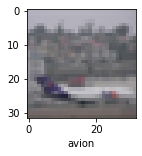

In [7]:
plot_ejemplo(X_train, y_train, 30000)

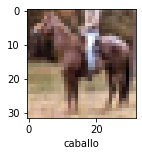

In [8]:
plot_ejemplo(X_train, y_train, 45000)

In [9]:
# Se normalizan las imágenes
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# se crea el modelo simple de redes neuronales artificiales

modelo = models.Sequential([
         layers.Flatten(input_shape=(32,32,3)),
         layers.Dense(3000, activation="relu"),
         layers.Dense(1000, activation="relu"),
         layers.Dense(10, activation="sigmoid")                  
      ])

modelo.compile(optimizer="SGD", 
               loss="sparse_categorical_crossentropy", 
               metrics=["accuracy"])

modelo.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.9251 - accuracy: 0.3065
Epoch 2/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.6469 - accuracy: 0.4188
Epoch 3/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5533 - accuracy: 0.4514
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4866 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4376 - accuracy: 0.4995
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3937 - accuracy: 0.5093
Epoch 7/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.3523 - accuracy: 0.5247
Epoch 8/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3203 - accuracy: 0.5362
Epoch 9/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.2880 - accuracy: 0.5518
Epoch 10/10
1563/1563 [==============================] 

In [11]:
modelo.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.3655 - accuracy: 0.5168


[1.3654937744140625, 0.5167999863624573]

In [12]:
#Se saca el reporte de clasificación para analizar el desempeño para cada clase del modelo
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = modelo.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1000
           1       0.65      0.64      0.65      1000
           2       0.51      0.23      0.31      1000
           3       0.35      0.42      0.38      1000
           4       0.43      0.52      0.47      1000
           5       0.49      0.30      0.37      1000
           6       0.55      0.60      0.58      1000
           7       0.71      0.49      0.58      1000
           8       0.49      0.78      0.61      1000
           9       0.55      0.59      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.51     10000
weighted avg       0.53      0.52      0.51     10000



In [13]:
cnn = models.Sequential([
    
        # cnn se utilizan dos capas 
        layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D((2,2)), 
    
        ## dense
         layers.Flatten(),
         layers.Dense(64, activation="relu"),
         layers.Dense(10, activation="softmax"),                  
      ])

In [14]:
cnn.compile(optimizer="adam", 
               loss="sparse_categorical_crossentropy", 
               metrics=["accuracy"])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7192 - accuracy: 0.3767
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1732 - accuracy: 0.5868
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0078 - accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9083 - accuracy: 0.6845
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8480 - accuracy: 0.7049
Epoch 6/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.7830 - accuracy: 0.7265
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7330 - accuracy: 0.7456
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6760 - accuracy: 0.7649
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6415 - accuracy: 0.7790
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9591 - accuracy: 0.6895


[0.9590879082679749, 0.6894999742507935]

In [17]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.7240964e-03, 1.3572002e-05, 7.0711691e-04, 7.2916991e-01,
        9.9648791e-04, 2.3794781e-01, 2.3829246e-02, 4.9396692e-04,
        1.8335077e-05, 9.9494187e-05],
       [2.9195467e-04, 7.4289434e-02, 2.0131149e-06, 2.3015151e-08,
        1.3574461e-06, 6.7718711e-09, 2.6300613e-09, 3.7563268e-08,
        9.2541456e-01, 6.8031102e-07],
       [1.1954311e-01, 5.8614486e-01, 6.1897575e-03, 6.5356325e-03,
        3.1980881e-03, 4.1152551e-03, 2.9352317e-03, 8.8665532e-03,
        2.4349938e-01, 1.8972171e-02],
       [3.8029185e-01, 2.5633430e-01, 1.6597806e-01, 7.3136459e-03,
        2.3088511e-03, 2.8280370e-04, 2.6528123e-03, 1.0838130e-03,
        1.8309072e-01, 6.6315342e-04],
       [3.9552533e-06, 5.7007978e-06, 1.6684668e-03, 1.0461929e-03,
        6.7215845e-02, 1.1994386e-05, 9.3004513e-01, 7.0581359e-07,
        1.9584891e-06, 3.7566124e-08]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

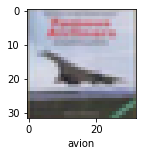

In [21]:
#Un ejemplo de predicción
plot_ejemplo(X_test, y_test,3)

In [22]:
classes[y_classes[3]]

'avion'

In [23]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.77      0.83      0.80      1000
           2       0.62      0.59      0.60      1000
           3       0.56      0.41      0.47      1000
           4       0.59      0.66      0.62      1000
           5       0.64      0.58      0.61      1000
           6       0.68      0.85      0.75      1000
           7       0.64      0.79      0.71      1000
           8       0.90      0.70      0.79      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

